In [456]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import math

In [457]:
sns.set_theme(context='paper', style='dark', palette='colorblind')

---
# Importing the data and EDA

In [458]:
# Load the JSON file and save it as a dictionary
with open('stock_info.json', 'r') as json_file:
    stock_info = json.load(json_file)

In [459]:
stock_info

{'A': {'52WeekChange': 0.17819285,
  'SandP52WeekChange': 0.2623955,
  'address1': '5301 Stevens Creek Boulevard',
  'ask': 142.69,
  'askSize': 1300,
  'auditRisk': 9,
  'averageDailyVolume10Day': 1261590,
  'averageVolume': 2092527,
  'averageVolume10days': 1261590,
  'beta': 1.049,
  'bid': 138.5,
  'bidSize': 900,
  'boardRisk': 4,
  'bookValue': 21.311,
  'city': 'Santa Clara',
  'companyOfficers': [{'exercisedValue': 0,
    'fiscalYear': 2023,
    'maxAge': 1,
    'name': 'Mr. Padraig  McDonnell',
    'title': 'CEO, President & Director',
    'totalPay': 1059678,
    'unexercisedValue': 0},
   {'age': 54,
    'exercisedValue': 0,
    'fiscalYear': 2023,
    'maxAge': 1,
    'name': 'Mr. Robert W. McMahon',
    'title': 'Senior VP & CFO',
    'totalPay': 1075376,
    'unexercisedValue': 0,
    'yearBorn': 1969},
   {'age': 58,
    'exercisedValue': 0,
    'fiscalYear': 2023,
    'maxAge': 1,
    'name': 'Mr. Henrik  Ancher-Jensen',
    'title': 'Senior VP and President of Order Fu

In [460]:
stock_info.keys()

dict_keys(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COR', 'COST', 'COTY', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DLR', 'DLTR', 'D

In [461]:
# Creating a dataframe for the stocks data
my_columns = ['Ticker', 'Stock Price', 'Market Capitalization', 'Number of Shares to Buy']
df = pd.DataFrame(columns=my_columns)
df

Empty DataFrame
Columns: [Ticker, Stock Price, Market Capitalization, Number of Shares to Buy]
Index: []

In [462]:
print(stock_info['AAPL']['symbol'])
print(stock_info['AAPL']['currentPrice'])
print(stock_info['AAPL']['marketCap'])

AAPL
226.05
3436886884352


In [463]:
# Extracting the ticker, price, and market cap for each stock
for stock in stock_info.keys():
    symbol = stock_info[f'{stock}'].get('symbol', 'N/A')
    current_price = stock_info[f'{stock}'].get('currentPrice', 'N/A')
    market_cap = stock_info[f'{stock}'].get('marketCap', 'N/A')
    
    new_row = pd.Series(
        [
            symbol,
            current_price,
            market_cap,
            'N/A'
        ],
        index=my_columns
    )

    # Convert the Series to a DataFrame and use pd.concat to append
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

In [464]:
df.describe()

Ticker Stock Price Market Capitalization Number of Shares to Buy
count     500         500                   500                     500
unique    500         466                   464                       1
top         A         N/A                   N/A                     N/A
freq        1          34                    36                     500

In [465]:
df.replace('N/A', pd.NA, inplace=True)

In [466]:
df.describe()

Ticker  Stock Price  Market Capitalization Number of Shares to Buy
count     500       466.00                    464                       0
unique    500       465.00                    463                       0
top         A       111.18             3398560000                     NaN
freq        1         2.00                      2                     NaN

There are some missing values in the dataset.

In [467]:
# Drop rows with NaN values in the specified columns only
columns_to_check = ['Ticker', 'Stock Price', 'Market Capitalization']
df.dropna(subset=columns_to_check, inplace=True)

In [468]:
df.describe()

Ticker  Stock Price  Market Capitalization Number of Shares to Buy
count     464       464.00                    464                       0
unique    464       463.00                    463                       0
top         A       111.18             3398560000                     NaN
freq        1         2.00                      2                     NaN

<Axes: xlabel='Stock Price', ylabel='Count'>

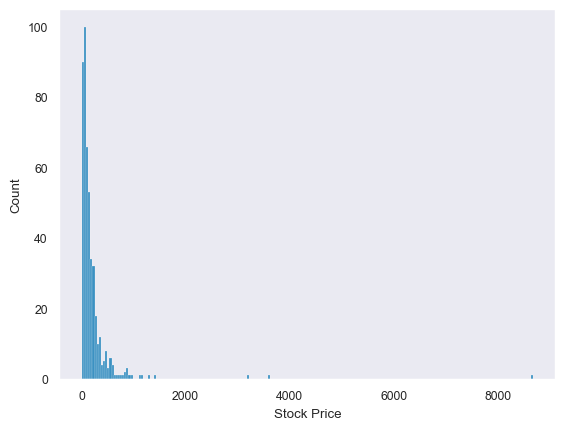

In [469]:
# Stock price histplot
sns.histplot(df, x='Stock Price')

In [470]:
# Checking for outliers
df[df['Stock Price'] >= 1000]

Ticker Stock Price Market Capitalization Number of Shares to Buy
51     AZO     3212.87           54884818944                    <NA>
62    BKNG     3618.86          121320112128                    <NA>
321    MTD     1417.58           30079911936                    <NA>
344    NVR     8668.93           26679410688                    <NA>
353   ORLY     1119.52           64938541056                    <NA>
388   REGN     1179.31          130001248256                    <NA>
426    TDG     1280.08           71827079168                    <NA>

In [471]:
# Checking the min, mean, max stock prices
print(df['Stock Price'].min())
print(df['Stock Price'].mean())
print(df['Stock Price'].max())

6.37
205.04450431034465
8668.93


<Axes: xlabel='Market Capitalization', ylabel='Count'>

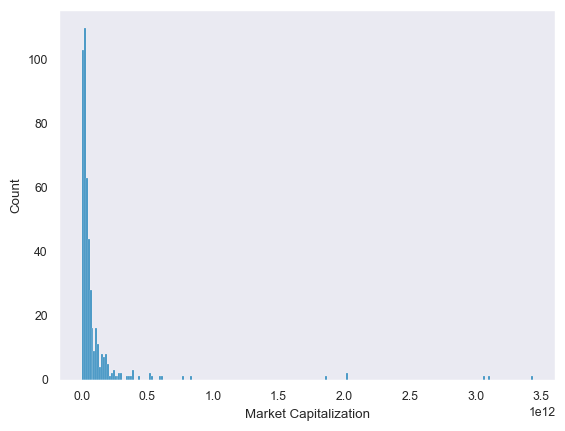

In [472]:
sns.histplot(df, x='Market Capitalization')

In [473]:
df[df['Market Capitalization'] >= (0.5 * 10**12)]

Ticker Stock Price Market Capitalization Number of Shares to Buy
3     AAPL      226.05         3436886884352                    <NA>
34    AMZN      177.06         1858350874624                    <NA>
47    AVGO      165.72          771406692352                    <NA>
202   GOOG      164.74         2015972818944                    <NA>
203  GOOGL      162.96         2015978323968                    <NA>
258    JPM      213.97          608778846208                    <NA>
281    LLY      922.12          830300815360                    <NA>
318   MSFT      418.47         3110504235008                    <NA>
343   NVDA      124.58         3064456282112                    <NA>
453    UNH      577.68          533440102400                    <NA>
459      V      267.38          520289419264                    <NA>
482    WMT       73.45          590797996032                    <NA>
491    XOM      118.17          525009190912                    <NA>

In [474]:
# Checking the min, mean, max market caps
print(df['Market Capitalization'].min())
print(df['Market Capitalization'].mean())
print(df['Market Capitalization'].max())

1231998208
100056754197.7931
3436886884352


---
# Calculating the Number of Shares to Buy

In [475]:
# Portfolio size input prompt
while True:
    portfolio_size = input('Enter the value of your portfolio:')
    try:
        val = float(portfolio_size)
        if val <= 0:
            print('Please enter a positive non-zero number')
        else:
            print(f"Portfolio value: {val:.2f}")
            break  # Exit the loop if the input is valid
    except ValueError:
        print('Please enter an integer or float value')

Portfolio value: 1000000.00


In [476]:
# Position size for each stock
position_size = val / len(df.index)
print(f'Position Size: {position_size:.2f}')

Position Size: 2155.17


In [477]:
# Calculating the number of shares to buy for each stock
df['Number of Shares to Buy'] = (position_size / df['Stock Price']).apply(math.floor)
df

Ticker Stock Price Market Capitalization  Number of Shares to Buy
0        A      140.04           40858206208                       15
1      AAL       10.05            6599875072                      214
2      AAP       62.19            3707910656                       34
3     AAPL      226.05         3436886884352                        9
4     ABBV       193.9          342493298688                       11
..     ...         ...                   ...                      ...
495    YUM       137.4           38632067072                       15
496    ZBH      110.65           22534094848                       19
497   ZBRA      344.14           17750880256                        6
498   ZION       46.59            6881202688                       46
499    ZTS      183.71           83230007296                       11

[464 rows x 4 columns]

In [478]:
df[df['Number of Shares to Buy'] > 0]

Ticker Stock Price Market Capitalization  Number of Shares to Buy
0        A      140.04           40858206208                       15
1      AAL       10.05            6599875072                      214
2      AAP       62.19            3707910656                       34
3     AAPL      226.05         3436886884352                        9
4     ABBV       193.9          342493298688                       11
..     ...         ...                   ...                      ...
495    YUM       137.4           38632067072                       15
496    ZBH      110.65           22534094848                       19
497   ZBRA      344.14           17750880256                        6
498   ZION       46.59            6881202688                       46
499    ZTS      183.71           83230007296                       11

[461 rows x 4 columns]

In [479]:
# CSV output
df.to_csv('Portfolio.csv', index=False)